## Map Visualizations in Python

This is something I personally was very excited about. I love maps. Layering data on top of maps seems like the coolest thing ever. 

Back to reality. Here is the deal: this is actually quite complicated. The basic issue is that when we are creating a map graphic, two things are going on...(i) we need to "plot" or draw the map and then (ii) "plot" the data on top of it in an informative way. Lots of packages have certain maps preloaded so this simplifies (i), then (ii) can be easy or complicated depending upon what you want to do. 

For this notebook, I'm going to try and provide the simplest exposition possible. We will focus on `Basemap` which is an extension within the `Matplotlib` suite. The key benefit of this is that we will generate a map that has the same `fig` and `ax` like properties of a traditional `Matplotlib` plot. The downside of this package is that some of the wants out of the map may require a lot of work / be very difficult.

This previous point is where some higher-level plotting packages may come in handy. And then end of this notebook, I provide some brief examples.
- `bokeh` This gives a quick way to get county, state fill ins. 
- `plotly` This is just a part of the nice and expansive 'plotly' package.
- `gmplo` This will plot stuff on a goolge map. 

More resources. I spent a lot of time investigating this. Here is a resource that I found helpful and this notebook builds closely on them:

- http://introtopython.org/visualization_earthquakes.html

#### Getting Started

Most of you proably do not have the Basemap package installed. To do so, open the terminal or command prompt and type

`conda install -c conda-forge basemap`   

to install. I had difficulty with `pip`, but this did the trick. Side note, `Basemap` appears to be using some depricated commands from `matplotlib` this will generate error messages below. I was looking at the issues on `Basemap`s github site, they know the issue and it will be fixed at some point.

In [4]:
from mpl_toolkits.basemap import Basemap # This is the new one....

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

This gets the packages loaded and lets look at a simple map of the globe and the functionality associated with it. **Important** depending on the options, generating the map can take some time. So be mindful of this within your workflow, e.g. work with a simpler map until you get it the way you want it, then add fancy options.

C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


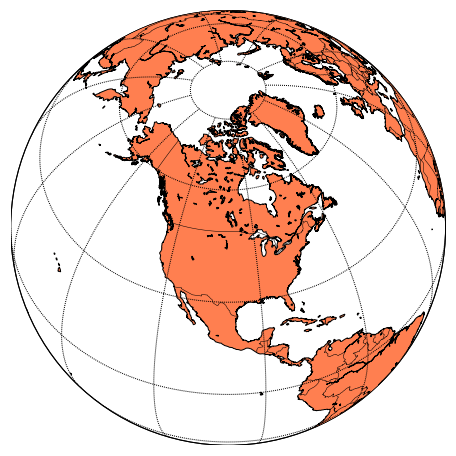

In [5]:
plt.figure(figsize=(8,8)) # just another command to generate a figure

# This is the key mapping function. Basemap takes some inputs and then
# creates an object with those map properties...then associated with 
# the object are methods and attributes to modify and customize the map

my_map = Basemap(projection='ortho', # This tells you the type of map, this will be a ball
                 lat_0=50, lon_0=-100, # This tells us the center point in latatiude and longitude
                 resolution='l',       # This is the resolution. "h" is a high resolution, may need to 
                                       # downlaod more
                 area_thresh=1000.0)   # This tells us how big a feature (e.g. a land mass) be to show up
                                       # in kilomiters.

# Then below are some options to customize this... 
# Turn them on and off and see what happens
#my_map.etopo() # This wil make a topographical map   
my_map.drawcoastlines() # draw the coastline
my_map.drawcountries()  # draw countries
#my_map.drawstates() # This appears to draw the state boundries for US,Canada, Latin America...
#my_map.bluemarble() # This will make "blue mable"
my_map.fillcontinents(color='coral') # What to fill the land color with

my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

**Now that is awesome!!!** 

One of the key features of the map is to specify a latitude and longitude. Quick primer:
- **latitude** specifies the north-south dimension. When the value is positive, it means we are talking about the northern hemisphere. When the value is negative, it means we are talking about the southern hemisphere.
- **longitude** specifies the east-west dimension. Here, when the value is positive, it means we are east of the "prime meridian" (think England and expand north-south). When the value is negative, it means that we are west of the "prime meridian".

So note above, the map was centerd on `lat_0=50, lon_0=-100` where the positive value of 50 means we are talking about the northern hemisphere, the negative longitude value means we are talking about the western hemisphere.

- **Exercise** Play with the options. See what happens...

Another example, I want the map to be centered on Argentina. Turns out Google is great at answering questions like "What is latitude and longitude of..." type questions. So I typed in  "What is latitude and longitude of center of Argentina?" And it reported back:

38.4161° S, 63.6167° W

So for latitude I put in -38.41. **Key is the minus sign** since this is in the southern hemisphere. Then for longitude, I put in -63.61, again key is the minus sign since this is reporting for the western hemisphere.

C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


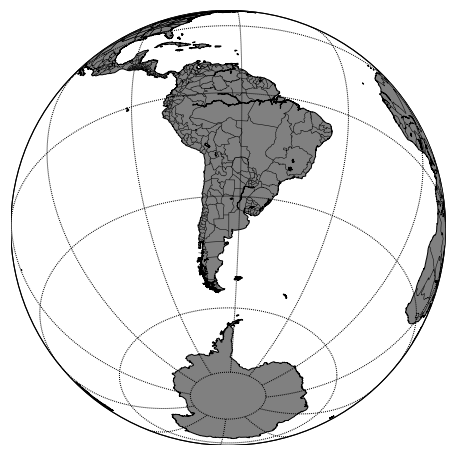

In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1

plt.figure(figsize=(8,8))

my_map = Basemap(projection='ortho', 
                 lat_0=-38.41, lon_0=-63.61, # Here is the update
                 resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawstates() 
my_map.fillcontinents(color='grey')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

Again, very cool....

### Learning about an Exotic Location: Tanzania

I think maps are great to communicate spatial distributions. They are especially important when your audience has little information about the "space" about which your talking about. For example, if you have a plot saying, see California is rich, West Virginia is poor, people from the United States have an understanding about how California and West Virginia relate to each other in space. But if I say, see Dar Es Salam is rich and Mtwara is poor, you have no idea what I'm talking about. Hence the map.

So let me bring you into my world a bit. Almost 5 years ago, I made a trip to Tanzania for work. It was an amazing experience for many reasons. Currently, I'm sitting on data from the World Bank that is a household survey of people living in Tanzania. One of the amazing features of the dataset is that it has (privacy adjusted) geo-coordinates of households. So its simple to ask, where are people, how well are they off.

**Step 1** Get a map of Tanzania. This took some work. First, what I did was I Googled "What is latitude and longitude of center of Tanzania". Then I don't want a globe like thing above, I want something that looks like a map in a book. So this is what I did...

C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


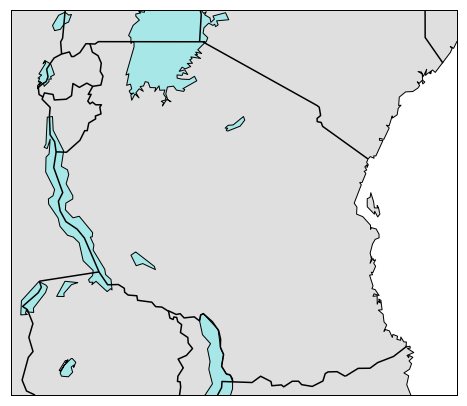

In [7]:
plt.figure(figsize=(8,8))

my_map = Basemap(projection='merc', # This is a simple one...some options require more input
                 resolution = 'l', area_thresh = 1000.0, # Same as above
                 llcrnrlon=28, llcrnrlat=-12, # This says "lower left hand cornoer lon, lower left hand corner lat
                 urcrnrlon=42, urcrnrlat=-0)  # This says upper right hand corner lon, upper right corner lat
                                              # Then it will draw a box given these specifications.
 
# Note given my starting point, I played alot with to find what I was looking for...
# For my Latin American friends, if you flip this the right way you can get the updside down
# perspective. 

my_map.drawcoastlines()
my_map.drawcountries(linewidth=1.5) # Make the country lines bolder
my_map.fillcontinents(color='grey',alpha = 0.25,lake_color='aqua') # Fill in the lakes
my_map.drawmapboundary()
  
plt.show()

Now lets add some markers for cities. When I visited, I went to Dar Es Salam and the Mtwara (and the region around it). Lets add the capital Dodoma for good measure (below I add more). The key issue here is where (specifically their latitude and longitude) are these cities. Again, googeling helps here....

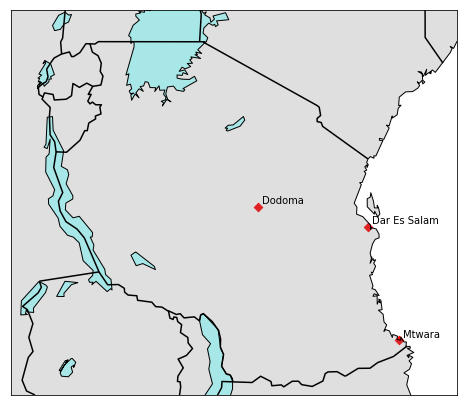

In [8]:
plt.figure(figsize=(8,8))

my_map = Basemap(projection='merc', # This is a simple one...some options require more input
                 resolution = 'l', area_thresh = 1000.0, # Same as above
                 llcrnrlon=28, llcrnrlat=-12, # This says "lower left hand cornoer lon, lower left hand corner lat
                 urcrnrlon=42, urcrnrlat=-0)  # This says upper right hand corner lon, upper right corner lat
                                              # Then it will draw a box given these specifications.

my_map.drawcoastlines()
my_map.drawcountries(linewidth=1.5) # Make the country lines bolder
my_map.fillcontinents(color='grey',alpha = 0.25,lake_color='aqua') # Fill in the lakes

########################################################################################
# This is what I found....

lon = [39.20 , 40.1760, 35.7516]

lat = [-6.79 , -10.3112, -6.1630]

labels = ['Dar Es Salam', 'Mtwara', 'Dodoma']

x,y = my_map(lon, lat) 

#This option generates the x and y locations on the image, given
# the latitude and longitude. Should be a list (can't be a dataframe)

my_map.scatter(x,y, latlon = False, alpha = 0.99, color = "red", marker='D')

#my_map.drawgreatcircle(lon[0], lat[0], lon[1], lat[1], linewidth = 2.0)
# If you wanted to draw a great circle line between them.

# Then here is a scatter plot like feature. x and y...
# Latlon says are the x and y latitude and longitude. We set False here
# as we already coverted them. Then ususal specifications.

# Then the final part, lets lable the cities with their name.

for label, xpt, ypt in zip(labels, x, y):
    
    plt.text(xpt+13000, ypt+13000, label)
 
plt.show()

This is nice.Now lets start to layer some information on this. 

Lets put makers on each city that are in proportion to their population size. Here, I just googled and got the city sizes from wikipedia. Then generated the graph below. Note: see the comment in the code about how I do this versus exploiting optionality in the `.scatter` command.

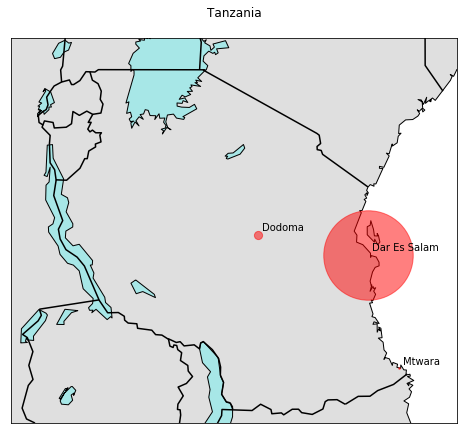

In [9]:
plt.figure(figsize=(8,8))

my_map = Basemap(projection='merc', # This is a simple one...some options require more input
                 resolution = 'l', area_thresh = 1000.0, # Same as above
                 llcrnrlon=28, llcrnrlat=-12, # This says "lower left hand cornoer lon, lower left hand corner lat
                 urcrnrlon=42, urcrnrlat=-0)  # This says upper right hand corner lon, upper right corner lat
                                              # Then it will draw a box given these specifications.

my_map.drawcoastlines()
my_map.drawcountries(linewidth=1.5) # Make the country lines bolder
my_map.fillcontinents(color='grey',alpha = 0.25,lake_color='aqua') # Fill in the lakes

########################################################################################
# This is what I found....

lon = [39.20 , 40.1760, 35.7516]

lat = [-6.79 , -10.3112, -6.1630]

labels = ['Dar Es Salam', 'Mtwara', 'Dodoma']

x,y = my_map(lon, lat) 

#This option generates the x and y locations on the image, given
# the latitude and longitude. Should be a list (can't be a dataframe)


population = [4.365, 0.080, 0.40]

min_marker_size = 20.5

for lon, lat, popul, label in zip(lon, lat, population, labels):
    x,y = my_map(lon, lat)
    msize = popul * min_marker_size
    
    my_map.plot(x, y, 'ro', markersize=msize, alpha = 0.5)
    
    # Here is what I'm doing, for each city I make the marker size
    # related to population. Note I'm doning this in a for loop
    # rather than directly though the scatter option as that took 
    # a very long time to generate the figure.
        
    plt.text(x + 13000, y + 13000, label)

      
plt.title("Tanzania\n")
 
plt.show()

### Geo-coded Household Data

As mentioned, I have data on households in Tanzania that is geo-coded. The purpose of this dataset is to measure living standards in Tanzania (one of the poorest countries in the world and to trace out how households move across space). So lets first use the map to see where people are and then see how well they are off across Tanzania.

The code below reads in a part of the dataset that I posted to GitHub.

In [10]:
path_laptop = "C://Users//mwaugh//Dropbox//Panel Tracking Surveys//Tanzania//Raw Data (2008-2009 and 2010-2011)"
path_desktop = "C://Users//mwaugh.NYC-STERN//Dropbox//Panel Tracking Surveys//Tanzania\Raw Data (2008-2009 and 2010-2011)"
file = path_desktop + "//TZY2.HH.Consumption.dta"

#tanz_c = pd.read_stata(file, columns = ["y2_hhid", "urban", "expmR", "adulteq"])

#tanz_c.to_csv("C://data_bootcamp//Data_Bootcamp_Fall_2017//data_bootcamp_1204//consumption.csv")

url = "https://raw.githubusercontent.com/mwaugh0328/Data_Bootcamp_Fall_2017/master/data_bootcamp_1204/consumption.csv"

tanz_c = pd.read_csv(url)

tanz_c.head()

,Unnamed: 0,y2_hhid,urban,expmR,adulteq
0,0,101014002017101,Rural,2453002.750,4.24
1,1,101014002028401,Rural,1364008.375,2.76
2,2,101014002029701,Rural,6136596.000,8.12
3,3,101014002029704,Urban,3419913.000,6.36
4,4,101014002040901,Rural,1228936.250,4.16


So this has a household id, if they are classified as rural or urban, real expenditures (consumption), and then adult equivalents. I'm going to create a numerical value for urban status and per capital consumption.

In [11]:
tanz_c["urban_num"] = np.where(tanz_c.urban == "Urban", 1.0, 0.0)

tanz_c["cons"] = tanz_c["expmR"] / tanz_c["adulteq"]

Then we want to merge this up with geo-codes. So below I read in the variables.

In [12]:
#file = path_desktop + "//HH.Geovariables_Y2.dta"

#geo_var = pd.read_stata(file, columns = ["y2_hhid", "lat_modified", "lon_modified"])

#geo_var.to_csv("C://data_bootcamp//Data_Bootcamp_Fall_2017//data_bootcamp_1204//geo_var.csv")

url = "https://raw.githubusercontent.com/mwaugh0328/Data_Bootcamp_Fall_2017/master/data_bootcamp_1204/geo_var.csv"

geo_var = pd.read_csv(url)


geo_var.head()

geo_var.shape

(3917, 4)

Now, here is an observation that I made. Note that while there are about 4000 households, there are really only 400 latitudes and longitudes...so what I think the geocodes are corresponding with is a broad notion of a village or location. This will be useful below.

In [13]:
geo_var.lon_modified.unique().shape 
# Now this is interesting because it tells me 
# that a lot of people or hh are at the same locatio.
# so lets first merge, then aggregate.

(409,)

In [14]:
tanz = pd.merge(tanz_c, geo_var, how='inner',
                         left_on = "y2_hhid", right_on = "y2_hhid", indicator = True)

#So mege on the houshold id, take the inner (I think some housholds split up, some dropped out could not be found).



Merge stuff together. This should start to feel familiar.

Ok, now lets create grouping on latitude and on longitude per the observations above. And then when we groupby, aggregate consumption by mean across households; a count of households, and a mean or rural urban status. 

In [15]:
geo_group = tanz.groupby(["lat_modified","lon_modified"])

cnt = geo_group.agg({"cons": "mean", "y2_hhid": "count", "urban_num": "mean"})

cnt.head(20)

cnt.reset_index(inplace = True)

cnt.head(10)

#cnt.sort_values("lat_modified").head(100)

,lat_modified,lon_modified,urban_num,cons,y2_hhid
0,-11.49701,35.607632,0.000000,397344.551492,9
1,-11.31545,34.786301,0.666667,766766.233372,9
2,-11.17032,34.996471,0.000000,443776.292471,10
3,-11.10879,34.642170,1.000000,530443.634563,10
4,-11.07245,37.319248,1.000000,499437.266714,10
5,-11.06224,37.305180,1.000000,787970.696811,8
6,-11.02628,37.362469,1.000000,603697.149681,9
7,-11.01194,37.269112,0.142857,642849.848570,7
8,-10.98745,34.893391,0.000000,590815.249149,9
9,-10.97143,37.398849,0.000000,344268.037931,9


**Awesome** Now lets plot these guys on the Tanzania map...

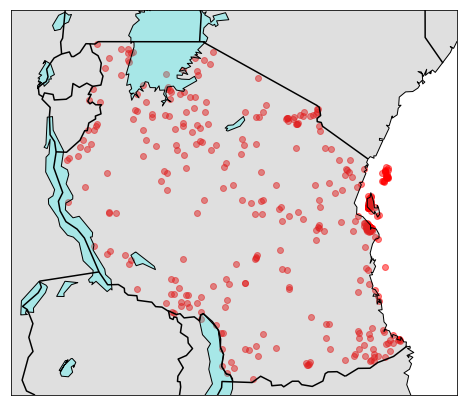

In [20]:
plt.figure(figsize=(8,8))

my_map = Basemap(projection='merc', # This is a simple one...some options require more input
                 resolution = 'l', area_thresh = 1000.0, # Change ARC Thres, some islands don't show up.
                 llcrnrlon=28, llcrnrlat=-12, # This says "lower left hand cornoer lon, lower left hand corner lat
                 urcrnrlon=42, urcrnrlat=-0)  # This says upper right hand corner lon, upper right corner lat
                                              # Then it will draw a box given these specifications.

my_map.drawcoastlines()
my_map.drawcountries(linewidth=1.5) # Make the country lines bolder
my_map.fillcontinents(color='grey',alpha = 0.25,lake_color='aqua') # Fill in the lakes


x,y = my_map(cnt.lon_modified.tolist(),cnt.lat_modified.tolist()) 

my_map.scatter(x,y, latlon = False, alpha = 0.5, color = "red")

plt.show()

This is kind of interesting. Here you can see the concentration in Dar Es Salam and Zanzibar, the lack of households within the Selous Game Reserve, people around Arusha (key part of Tanzania's tourist industry). Also if you google it, you can get a sense that roads are around the people (which causes which?). Now lets classify each spot as rural or urban and assign it a color and add some city locations.

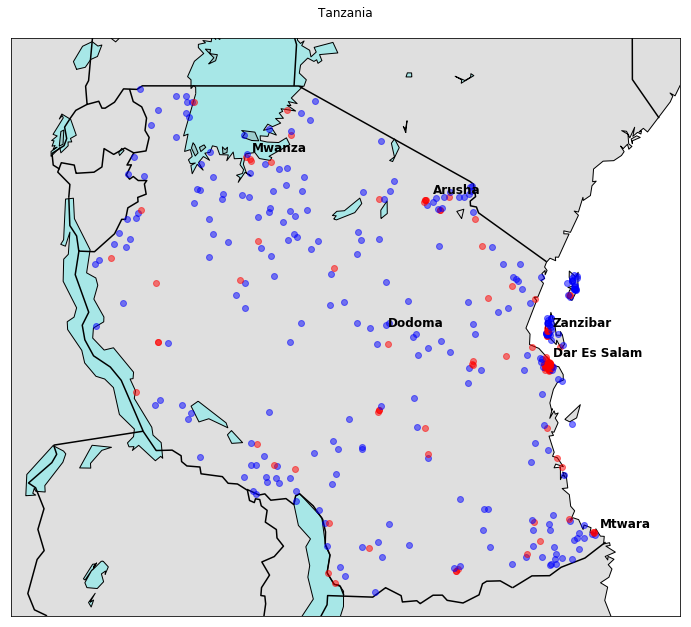

In [21]:
plt.figure(figsize=(12,12))

my_map = Basemap(projection='merc', # This is a simple one...some options require more input
                 resolution = 'l', area_thresh = 100.0, # Change ARC Thres, some islands don't show up.
                 llcrnrlon=28, llcrnrlat=-12, # This says "lower left hand cornoer lon, lower left hand corner lat
                 urcrnrlon=42, urcrnrlat=-0)  # This says upper right hand corner lon, upper right corner lat
                                              # Then it will draw a box given these specifications.

my_map.drawcoastlines()
my_map.drawcountries(linewidth=1.5) # Make the country lines bolder
my_map.fillcontinents(color='grey',alpha = 0.25,lake_color='aqua') # Fill in the lakes

###########################################################################################

def get_marker_color(urban):
    if urban > 0.50:
        return ('ro')
    else:
        return ('bo')

min_marker_size = 6.0

for lon, lat, urban in zip(cnt.lon_modified.tolist(), cnt.lat_modified.tolist(), cnt.urban_num.tolist()):
    x,y = my_map(lon, lat)
    msize = min_marker_size
    mark_color = get_marker_color(urban)
    my_map.plot(x, y, mark_color, markersize=msize, alpha = 0.50)
    

###########################################################################################
# Lets put some cities on this...

lon = [39.20 , 40.1760, 35.7516, 32.9175, 39.2026, 36.6830]

lat = [-6.79 , -10.3112, -6.1630, -2.5164, -6.1659, -3.3869]

labels = ["Dar Es Salam", "Mtwara", "Dodoma", "Mwanza", "Zanzibar", "Arusha"]

x,y = my_map(lon, lat) 

for label, xpt, ypt in zip(labels, x, y):
    
    plt.text(xpt+15000, ypt+15000, label, weight = "bold", fontsize=12)
    
    
plt.title("Tanzania\n")
 
plt.show()

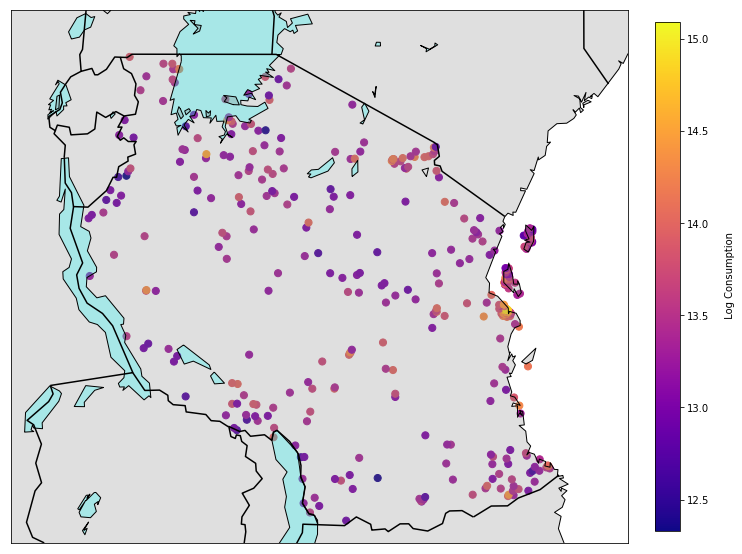

In [17]:
plt.figure(figsize=(12,12))

my_map = Basemap(projection='merc', # This is a simple one...some options require more input
                 resolution = 'l', area_thresh = 100.0, # Change ARC Thres, some islands don't show up.
                 llcrnrlon=28, llcrnrlat=-12, # This says "lower left hand cornoer lon, lower left hand corner lat
                 urcrnrlon=42, urcrnrlat=-0)  # This says upper right hand corner lon, upper right corner lat
                                              # Then it will draw a box given these specifications.

my_map.drawcoastlines()

my_map.drawcountries(linewidth=1.5) # Make the country lines bolder

my_map.fillcontinents(color='grey',alpha = 0.25,lake_color='aqua') # Fill in the lakes

x,y = my_map(cnt.lon_modified.tolist(),cnt.lat_modified.tolist()) 

my_map.scatter(x,y, latlon = False, c = np.log(cnt.cons.tolist()), cmap = "plasma",s = 50)

plt.colorbar(label = "\n Log Consumption",fraction=0.038, pad=0.04)

plt.show()

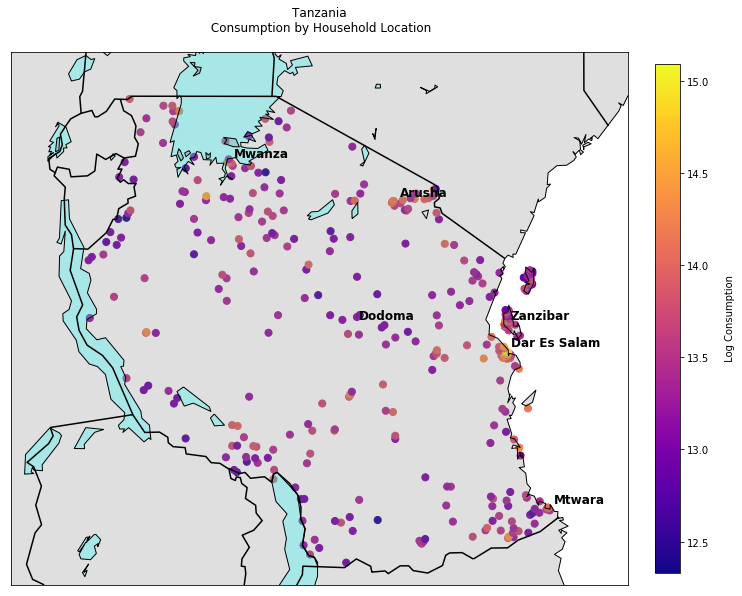

In [18]:
plt.figure(figsize=(12,12))

my_map = Basemap(projection='merc', # This is a simple one...some options require more input
                 resolution = 'l', area_thresh = 100.0, # Change ARC Thres, some islands don't show up.
                 llcrnrlon=28, llcrnrlat=-12, # This says "lower left hand cornoer lon, lower left hand corner lat
                 urcrnrlon=42, urcrnrlat=-0)  # This says upper right hand corner lon, upper right corner lat
                                              # Then it will draw a box given these specifications.

my_map.drawcoastlines()

my_map.drawcountries(linewidth=1.5) # Make the country lines bolder

my_map.fillcontinents(color='grey',alpha = 0.25,lake_color='aqua') # Fill in the lakes

x,y = my_map(cnt.lon_modified.tolist(),cnt.lat_modified.tolist()) 

my_map.scatter(x,y, latlon = False, c = np.log(cnt.cons.tolist()), cmap = "plasma",s = 50)

plt.colorbar(label = "\n Log Consumption",fraction=0.038, pad=0.04)

###########################################################################################
# Lets put some cities on this...

lon = [39.20 , 40.1760, 35.7516, 32.9175, 39.2026, 36.6830]

lat = [-6.79 , -10.3112, -6.1630, -2.5164, -6.1659, -3.3869]

labels = ["Dar Es Salam", "Mtwara", "Dodoma", "Mwanza", "Zanzibar", "Arusha"]

x,y = my_map(lon, lat) 

for label, xpt, ypt in zip(labels, x, y):
    
    plt.text(xpt+15000, ypt+15000, label, weight = "bold", fontsize=12)
 

plt.title("Tanzania\n Consumption by Household Location\n")

plt.show()

Finally, lets do this side by side. Note, still some kinks to be worked out in this one.

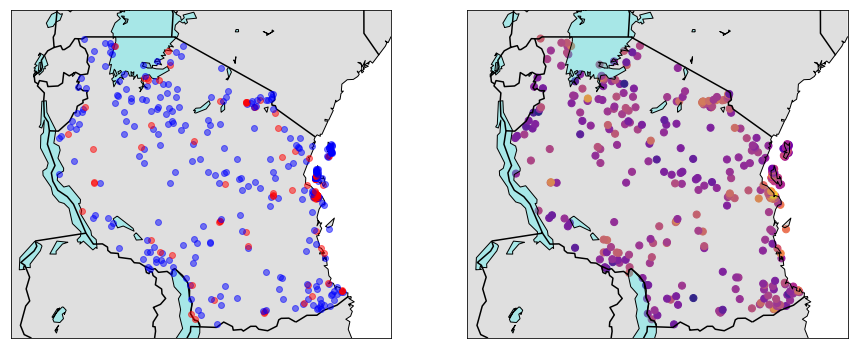

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (15,15))

###########################################################################################

my_map = Basemap(projection='merc', # This is a simple one...some options require more input
                 resolution = 'l', area_thresh = 100.0, # Change ARC Thres, some islands don't show up.
                 llcrnrlon=28, llcrnrlat=-12, # This says "lower left hand cornoer lon, lower left hand corner lat
                 urcrnrlon=42, urcrnrlat=-0, ax = ax[0])  # This says upper right hand corner lon, upper right corner lat
                                              # Then it will draw a box given these specifications.

my_map.drawcoastlines()

my_map.drawcountries(linewidth=1.5) # Make the country lines bolder

my_map.fillcontinents(color='grey',alpha = 0.25,lake_color='aqua') # Fill in the lakes



def get_marker_color(urban):
    if urban > 0.50:
        return ('ro')
    else:
        return ('bo')

min_marker_size = 6.0

for lon, lat, urban in zip(cnt.lon_modified.tolist(), cnt.lat_modified.tolist(), cnt.urban_num.tolist()):
    x,y = my_map(lon, lat)
    msize = min_marker_size
    mark_color = get_marker_color(urban)
    my_map.plot(x, y, mark_color, markersize=msize, alpha = 0.50)

###########################################################################################
# Lets put some cities on this...

my_map = Basemap(projection='merc', # This is a simple one...some options require more input
                 resolution = 'l', area_thresh = 100.0, # Change ARC Thres, some islands don't show up.
                 llcrnrlon=28, llcrnrlat=-12, # This says "lower left hand cornoer lon, lower left hand corner lat
                 urcrnrlon=42, urcrnrlat=-0,ax = ax[1])  # This says upper right hand corner lon, upper right corner lat
                                              # Then it will draw a box given these specifications.

my_map.drawcoastlines()

my_map.drawcountries(linewidth=1.5) # Make the country lines bolder

my_map.fillcontinents(color='grey',alpha = 0.25,lake_color='aqua') # Fill in the lakes

x,y = my_map(cnt.lon_modified.tolist(),cnt.lat_modified.tolist()) 

my_map.scatter(x,y, latlon = False, c = np.log(cnt.cons.tolist()), cmap = "plasma", s = 50)

#fig.colorbar()

###########################################################################################

plt.show()